**Spam SMS Detection using Machine Learning**

"Importing Necessary Modules"

In [1]:
import pandas as pd
import seaborn as sns

"Reading the Dataset" 

In [2]:
data = pd.read_csv("spam.csv")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


"Data Cleaning"

In [4]:
data.rename(columns= {'v1': 'Class','v2':'Message'},inplace=True)

In [5]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


"Exploratory Data Analysis(EDA)"

In [7]:
data.value_counts('Class')

Class
ham     4825
spam     747
dtype: int64

In [8]:
data_spam = data[data.Class=='spam']
data_spam

,Class,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


"Train Test Split"

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'spam' else 0)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data['Message'], data['Class'], test_size = 0.2, random_state = 42)

In [12]:
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1115,)
rows in train set: (4457,)


"Changing texts to vectors using TF-IDF Vectorizer"

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
list = x_train.tolist()
vector = TfidfVectorizer(input= list ,lowercase=True, stop_words='english')

formatted_train = vector.fit_transform(list)
formatted_test = vector.transform(x_test)


**"Model using Multinomial Naive Bayes Classifier"**

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model = MultinomialNB()
model.fit(formatted_train,y_train)

MultinomialNB()

In [17]:
predictions = model.predict(formatted_test)

"Model Accuracy Testing"

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
ac = accuracy_score(y_test,predictions)
cm = confusion_matrix(y_test, predictions)

In [20]:
print("Accuracy is : "+str(ac))

Accuracy is : 0.9668161434977578


<AxesSubplot:>

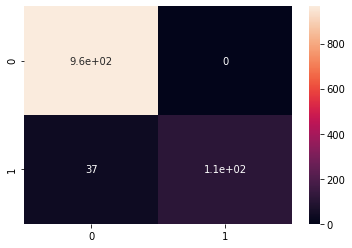

In [21]:
sns.heatmap(cm, annot=True)

That's a pretty decent accuracy lets try out some other models as there is always a scope for improvement.

**Lets try Support Vector Classifier**

In [22]:
from sklearn.svm import SVC 
sv = SVC()

In [23]:
sv.fit(formatted_train, y_train)

SVC()

In [24]:
preds = sv.predict(formatted_test)

In [25]:
acc_sv = accuracy_score(y_test, preds)
print('Accuracy is : ', acc_sv*100, '%')

Accuracy is :  97.66816143497758 %


**97% is a very good accuracy, but lets try some other algorithms**

****

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [27]:
xgb.fit(formatted_train, y_train)
xg_pred = xgb.predict(formatted_test)
ac_xg = accuracy_score(y_test, xg_pred)
print('Accuracy is ', ac_xg*100, '%')

Accuracy is  96.95067264573991 %


**Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [29]:
lgr.fit(formatted_train, y_train)
lgr_pred = lgr.predict(formatted_test)
ac_lgr = accuracy_score(y_test, lgr_pred)
print('Accuracy is ', ac_lgr*100, '%')

Accuracy is  95.24663677130046 %


Now lets compare the accuracies

In [30]:
import plotly.express as pl

In [31]:
accuracies = [ac, acc_sv, ac_xg, ac_lgr]
models = ["NB", "SVC", "XGBoost", "Logistic Regression"]
pl.bar(accuracies, x=models,y=accuracies)

**SVC or Support Vector Classifier has the highest accuracy among all**